# Assignment Set 7 - Plots

In [197]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

C:\Users\maste\AppData\Local\Temp\ipykernel_6988\604688095.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


### Q1. Plot the Air Passenger traffic change over time

In [198]:
# Input
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')
df.head()
x=df['date']
y=df['value']
df['date'].value_counts()

1949-01-01    1
1949-02-01    1
1956-09-01    1
1956-10-01    1
1956-11-01    1
             ..
1953-01-01    1
1953-02-01    1
1953-03-01    1
1953-04-01    1
1960-12-01    1
Name: date, Length: 144, dtype: int64

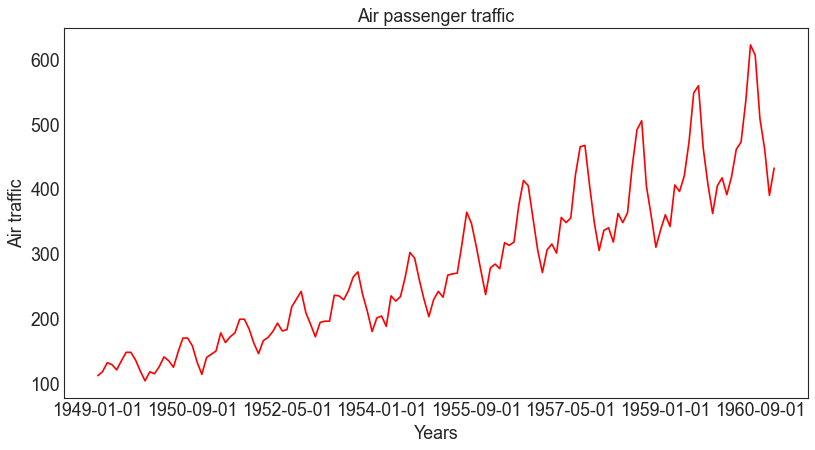

In [199]:
plt.figure(figsize=(12,6),dpi=80)
plt.plot(x,y,color='red')
plt.title("Air passenger traffic")
plt.xlabel("Years")
plt.ylabel("Air traffic")
plt.xticks(np.arange(0,len(x),20))
plt.show()

### Q2. Plot the Air Passenger traffic change over time and plot all the the peaks and troughs and annotate the occurence of some special events (every 3rd peak and trough)

In [200]:
# Input
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')
df.head()


,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [201]:
#get all peaks and troughs

data = df['value'].values
doublediff = np.diff(np.sign(np.diff(data)))
peaklocations= np.where(doublediff==-2)[0]+1
doublediff2=np.diff(np.sign(np.diff(-1*data)))
troughlocations= np.where(doublediff2==-2)[0]+1

thirdrdpeak = peaklocations[::3]
thirdtrough=troughlocations[::3]
    



In [202]:
for p,t in zip(peaklocations[::3],troughlocations[::3]):
    print(p,t)

2 4
26 16
50 34
62 52
78 63
90 82
103 94
115 106
127 118


C:\Users\maste\anaconda3\envs\Venv_Learning\Lib\site-packages\matplotlib\text.py:1475: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = float(self.convert_xunits(x))


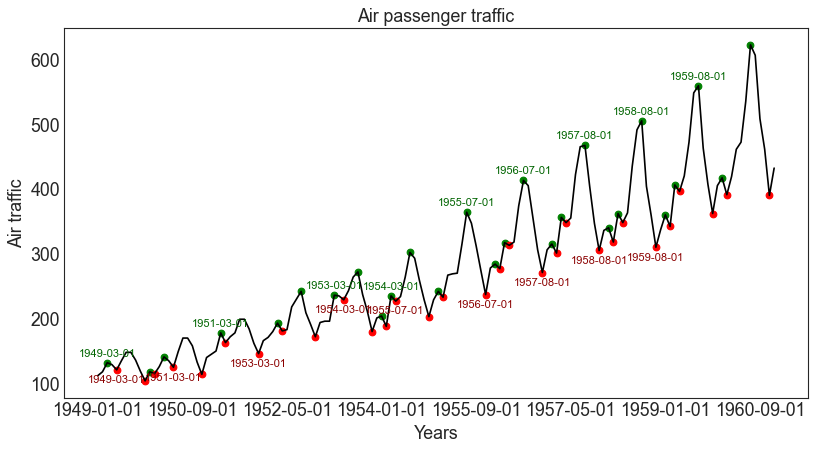

In [203]:
plt.figure(figsize=(12,6),dpi=80)
plt.plot(x,y,color='k')
plt.scatter(df.iloc[peaklocations]['date'],df.iloc[peaklocations]['value'],color='Green',label='peaks')
plt.scatter(df.iloc[troughlocations]['date'],df.iloc[troughlocations]['value'],color='red',label='trough')
for p,t in zip(peaklocations[::3],troughlocations[::3]):
    plt.annotate(df['date'][p],xy=(df['date'][p],df['value'][p]),xytext=(df['date'][p],df['value'][p]+15),horizontalalignment='center',verticalalignment='center',color='darkgreen')
    plt.annotate(df['date'][p],xy=(df['date'][t],df['value'][t]),xytext=(df['date'][t],df['value'][t]-15),horizontalalignment='center',verticalalignment='center',color='darkred')
plt.title("Air passenger traffic")
plt.xlabel("Years")
plt.ylabel("Air traffic")
plt.xticks(np.arange(0,len(x),20))
plt.show()

### Q3. Plot multiple time series of same range on the same chart
- plot mdeaths and fdeaths

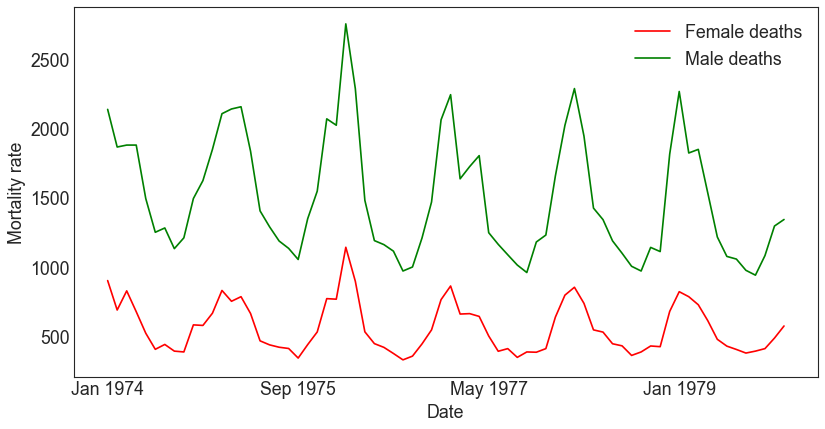

In [107]:
# Input
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mortality.csv')
df.head()
plt.figure(figsize=(12,6),dpi=80)
plt.plot(df['date'],df['fdeaths'],color='red',label='Female deaths')
plt.plot(df['date'],df['mdeaths'],color='Green',label='Male deaths')
plt.xlabel('Date')
plt.ylabel("Mortality rate")
plt.xticks(np.arange(0,len(df['date']),20))
plt.legend()
plt.show()

### Q4. Compare the number of unique vehicles manufactured under various vehicle types. Draw a bar plot to represent it and arrange the bars in descending order

<Axes: xlabel='Vehicle Type'>

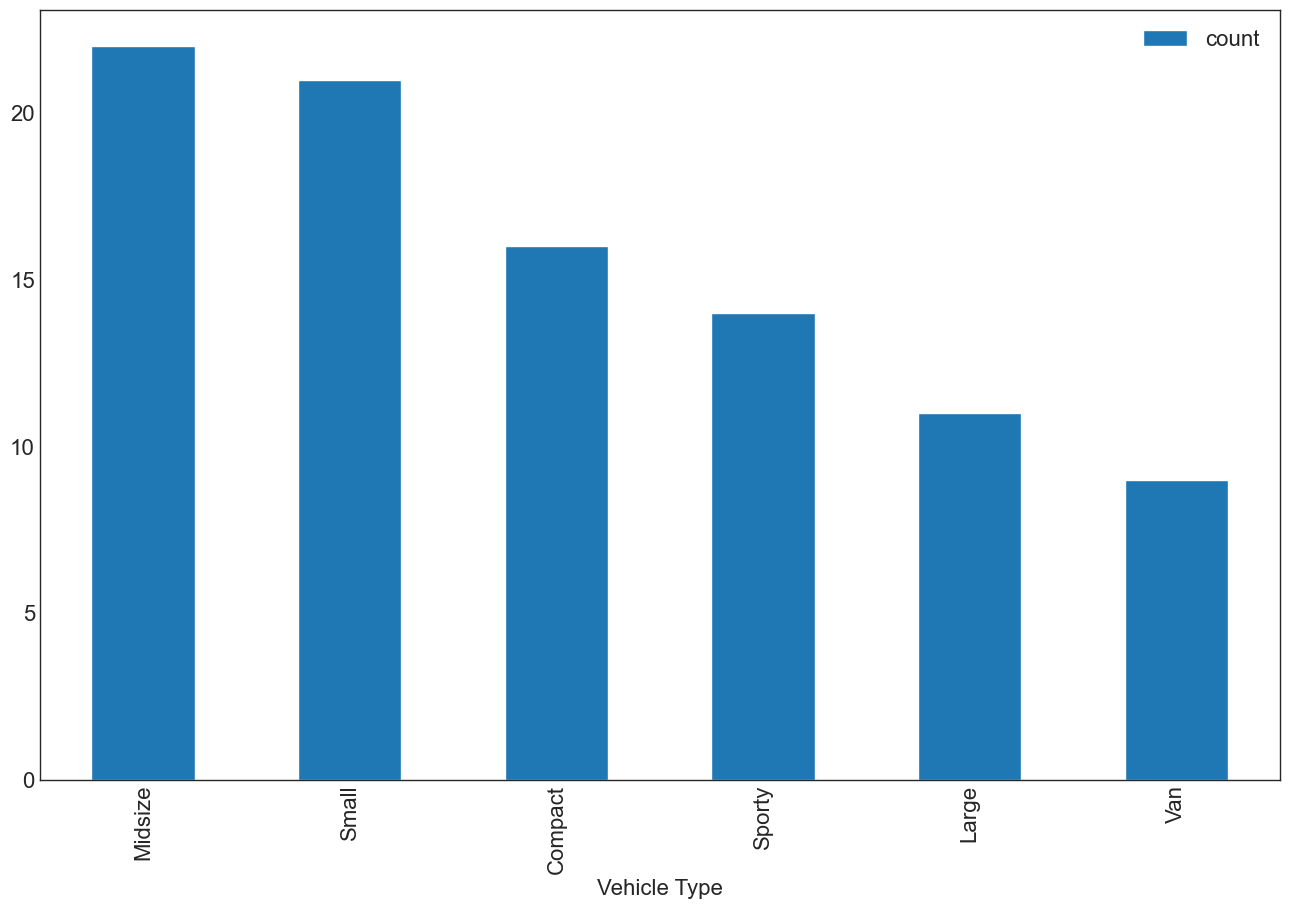

In [126]:
# Input
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93.csv')
df=df['Type'].value_counts().reset_index(name='count')
df.rename(columns={"index":"Vehicle Type"},inplace=True)
df.plot(kind='bar',x='Vehicle Type',y='count')


### Q5. Compare the number of unique vehicles under every vehicle type and group it by DriveTrain. Draw a stacked bar chart for it, group the charts by DriveTrain

<Axes: xlabel='Type'>

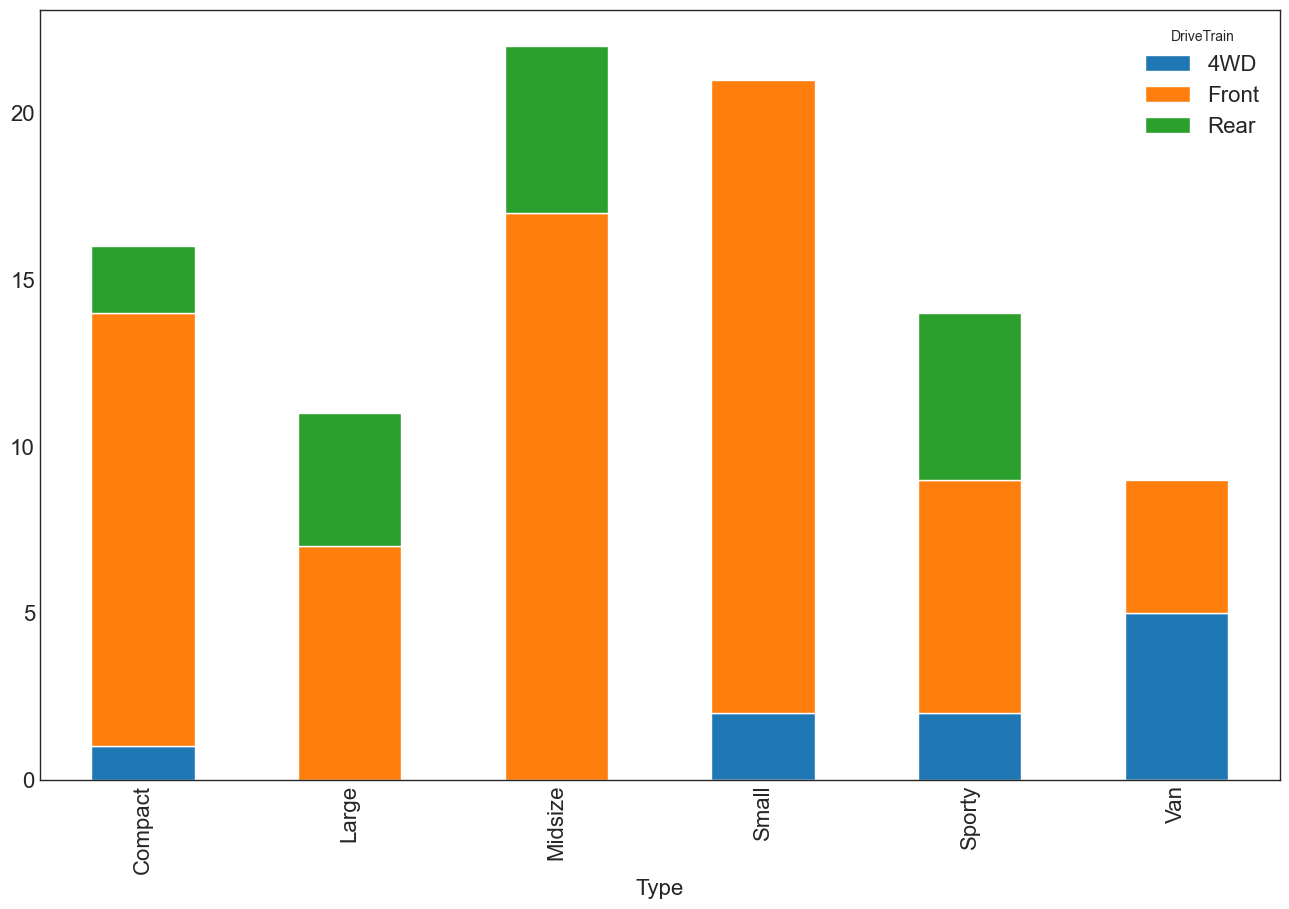

In [204]:
# Input
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93.csv')
df.head()
df_stacked =df.groupby('Type')['DriveTrain'].value_counts().unstack()
df_stacked.plot(kind='bar',stacked=True)


### Q6.  Check the distribution of Price in Cars93 dataset

C:\Users\maste\AppData\Local\Temp\ipykernel_6988\3900467291.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'],bins=20,kde=True)


<Axes: xlabel='Price', ylabel='Density'>

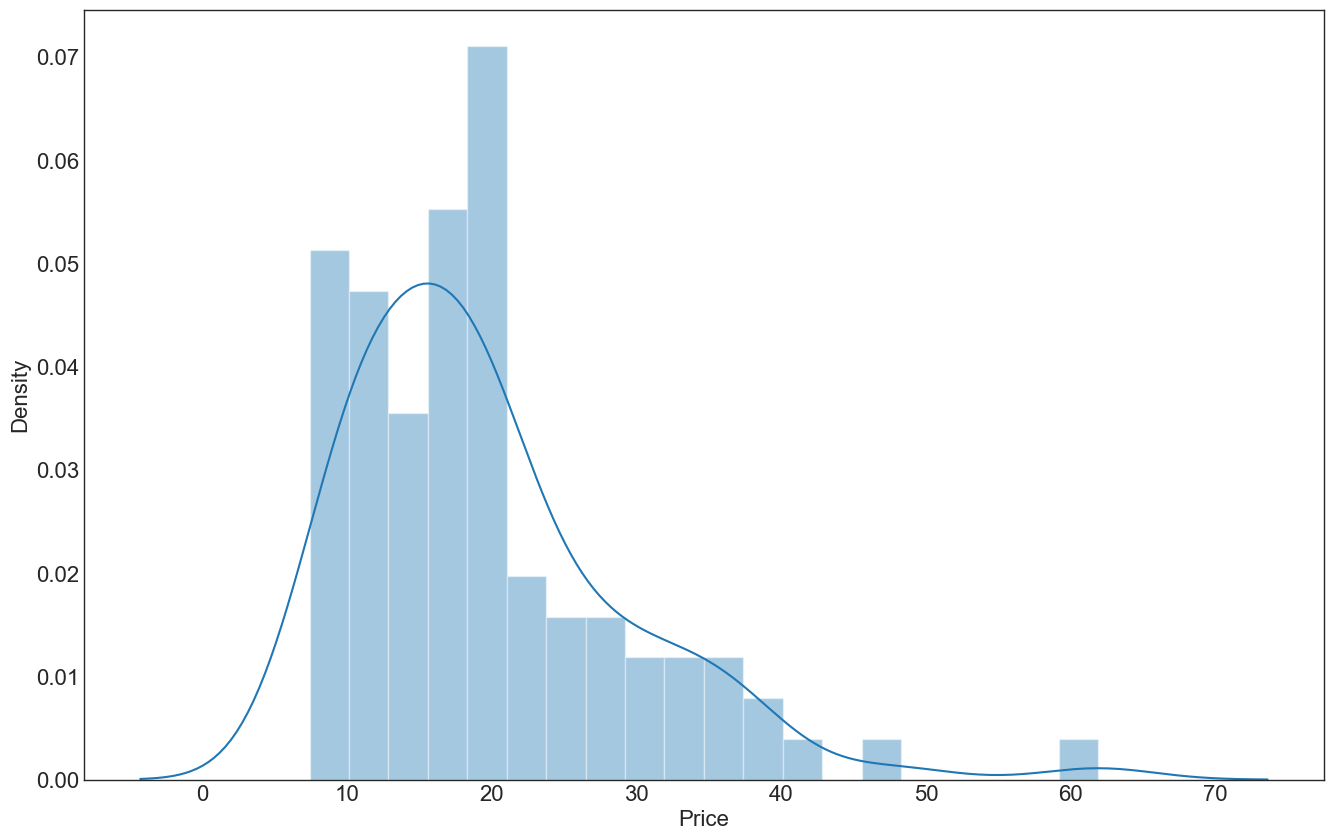

In [146]:
# Input
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93.csv')
df.head()
sns.distplot(df['Price'],bins=20,kde=True)

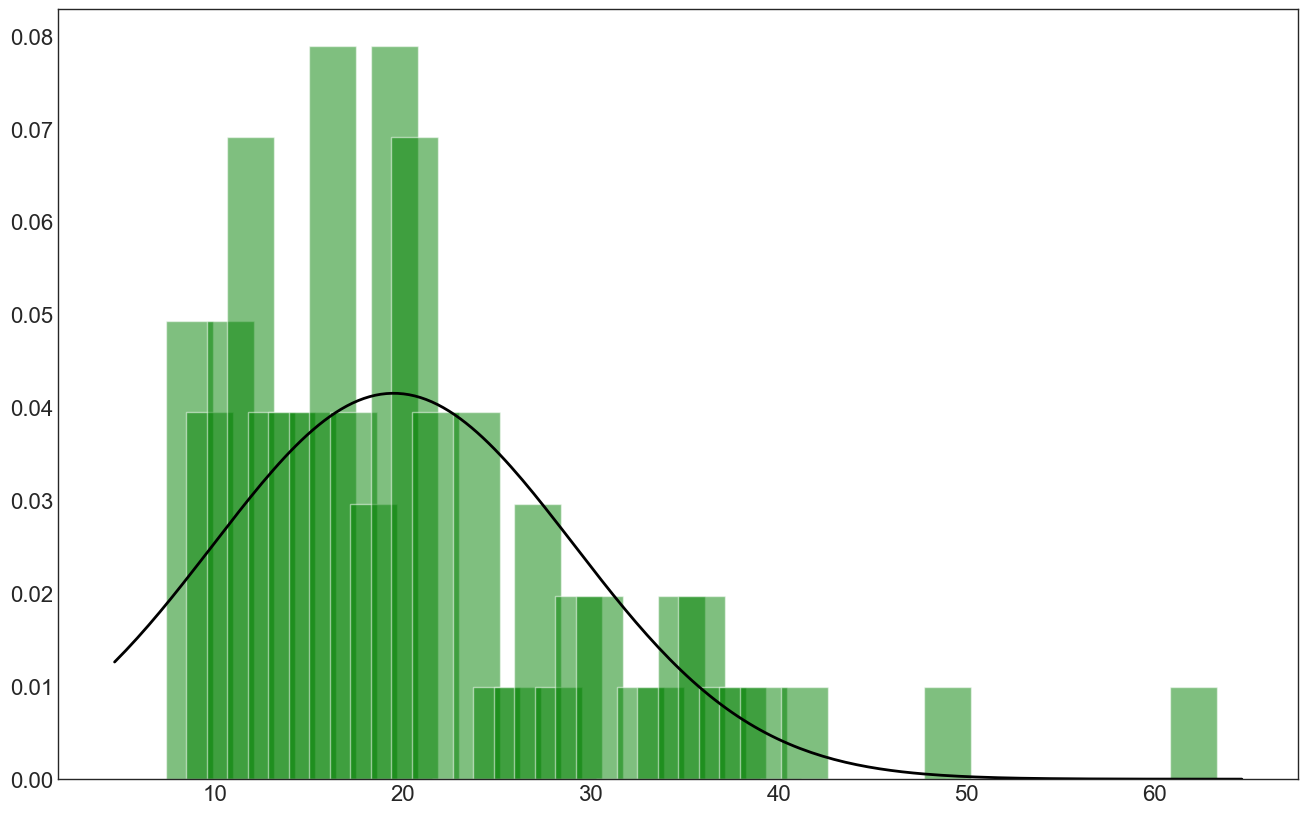

In [182]:
import matplotlib.pyplot as plt 
from scipy.stats import norm
import numpy as np
plt.figure()
plt.hist(df['Price'],bins=50,width=2.5,alpha=0.5,color='green',density=.6)
mu,std=norm.fit(df['Price'])
xmin, xmax = plt.xlim()
x=np.linspace(xmin,xmax,200)
p=norm.pdf(x,mu,std)
plt.plot(x, p,'k',linewidth=2)
plt.show()

### Q7.  Check the relation between MPG.highway and Weight of the vehicle using a regression plot

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


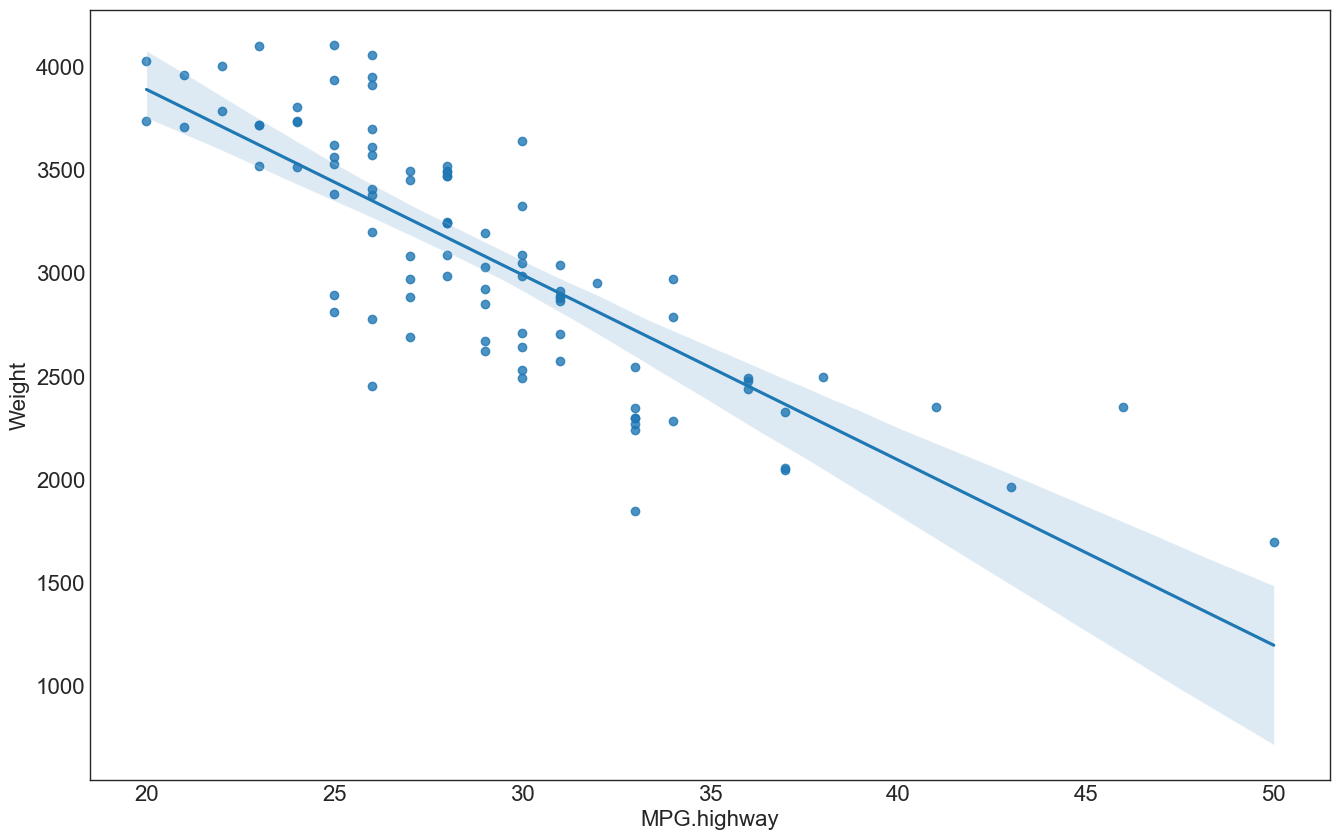

In [187]:
# Input
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93.csv')
df.head()
sns.regplot(x= df['MPG.highway'],y =df['Weight'])
df.head()

### Q8.  Check the relation between MPG.highway and Weight of the vehicle using a regression plot. Check if different type of vehicles have different relation.

C:\Users\maste\anaconda3\envs\Venv_Learning\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
C:\Users\maste\anaconda3\envs\Venv_Learning\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
C:\Users\maste\anaconda3\envs\Venv_Learning\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more info

[(15.0, 50.0),
 (0.0, 5000.0),
 Text(0.5, 35.000000000000014, 'MPGHighway'),
 Text(55.164700520833335, 0.5, 'Weight')]

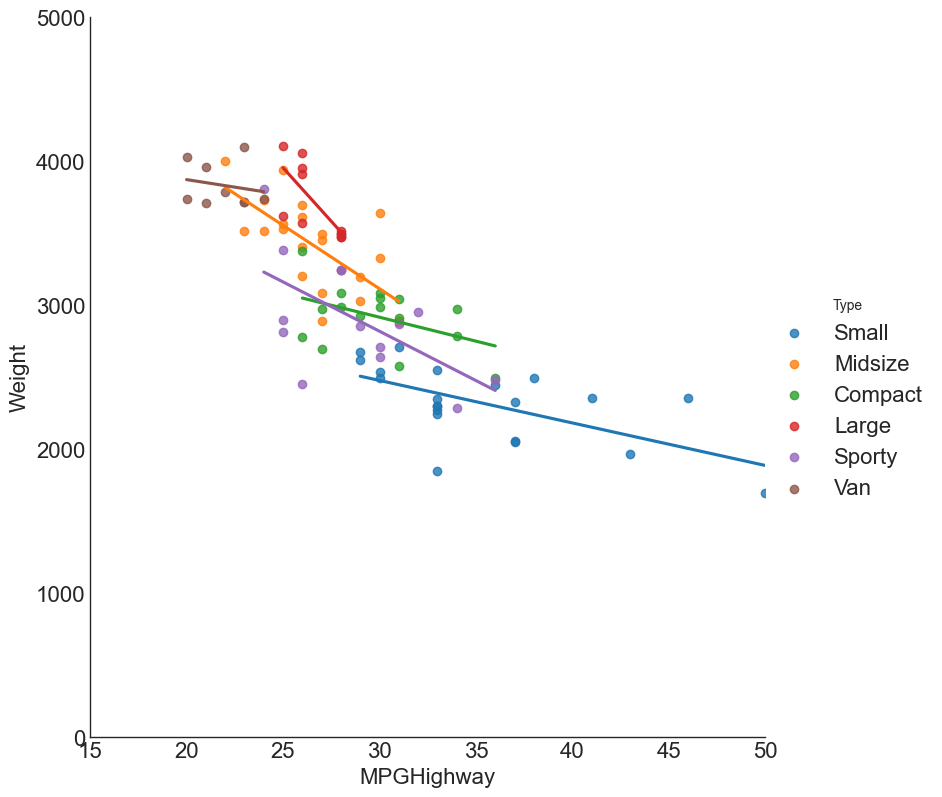

In [207]:
# Input
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93.csv')
df.head()
sns.lmplot(data=df, x='MPG.highway',y='Weight',hue='Type',ci=None,height=8)
plt.gca().set(xlim=(15,50),ylim=(0,5000),xlabel='MPGHighway',ylabel='Weight')
